In [1]:
 from IPython.display import Image
 %matplotlib inline

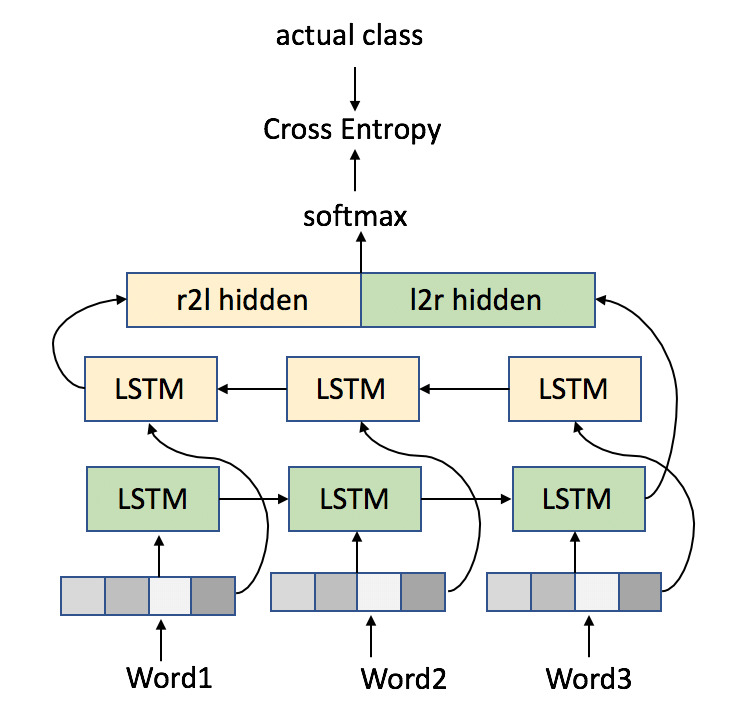

In [2]:
Image(filename='lstm.jpg',width=400)

In [4]:
from random import random
from numpy import array
from numpy import cumsum
def get_sequence(n_timesteps):
    
    x=array([random() for _ in range(n_timesteps)])
    limit=n_timesteps/4.0
    y=array([0 if x<limit else 1 for x in cumsum(x)])
    
    return x,y
x,y=get_sequence(10)
print('Input Sequence-x:\n',x)
print()
print('Output-y:\n',y)

Input Sequence-x:
 [0.74490118 0.75463119 0.61844276 0.16033683 0.6888479  0.35995131
 0.36428441 0.52286059 0.14094389 0.13976074]

Output-y:
 [0 0 0 0 1 1 1 1 1 1]


In [7]:
#Generate Multiple Sequences
def get_sequences(n_sequences, n_timesteps):
    seq_x, seq_y = list(), list()
    
    for _ in range(n_sequences):
        x, y = get_sequence(n_timesteps)
        seq_x.append(x)
        seq_y.append(y)
    
    seq_x = np.array(seq_x).reshape(n_sequences, n_timesteps, 1)
    seq_y = np.array(seq_y).reshape(n_sequences, n_timesteps, 1)
    
    return seq_x, seq_y

In [9]:
import numpy as np
get_sequences(2,10)

(array([[[0.00210541],
         [0.21585912],
         [0.46531007],
         [0.96089719],
         [0.7993195 ],
         [0.97452822],
         [0.35085443],
         [0.67012622],
         [0.4788049 ],
         [0.26526221]],
 
        [[0.58021148],
         [0.90950582],
         [0.36371856],
         [0.27349265],
         [0.46626718],
         [0.94053538],
         [0.27634176],
         [0.75840882],
         [0.28808039],
         [0.53195416]]]),
 array([[[0],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1]],
 
        [[0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [1],
         [1],
         [1],
         [1]]]))

In [11]:
 n_timesteps=10

In [12]:
#Build a Bidirectional model

from keras.models import Sequential
from keras.layers import Bidirectional
from keras.layers import TimeDistributed
from keras.layers import Dense,LSTM
model=Sequential()
#bidirectional layer
model.add(Bidirectional(LSTM(50,return_sequences=True),input_shape=(n_timesteps,1)))
#Output layer - time distributed layer
model.add(TimeDistributed(Dense(1,activation='sigmoid')))
#compile the model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirection  (None, 10, 100)           20800     
 al)                                                             
                                                                 
 time_distributed (TimeDist  (None, 10, 1)             101       
 ributed)                                                        
                                                                 
Total params: 20901 (81.64 KB)
Trainable params: 20901 (81.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [13]:
#train the model
x,y=get_sequences(50000,n_timesteps)
model.fit(x,y,epochs=10,batch_size=10)

Epoch 1/10
5000/5000 [==============================] - 25s 4ms/step - loss: 0.0498 - accuracy: 0.9827
Epoch 2/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.0210 - accuracy: 0.9929
Epoch 3/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.0168 - accuracy: 0.9939
Epoch 4/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0148 - accuracy: 0.9945
Epoch 5/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.0139 - accuracy: 0.9946
Epoch 6/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0131 - accuracy: 0.9949
Epoch 7/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.0119 - accuracy: 0.9953
Epoch 8/10
5000/5000 [==============================] - 21s 4ms/step - loss: 0.0114 - accuracy: 0.9954
Epoch 9/10
5000/5000 [==============================] - 20s 4ms/step - loss: 0.0107 - accuracy: 0.9958
Epoch 10/10
5000/5000 [==============================] - 20s 4ms/step - l

In [14]:
#Evaluate the model
x,y=get_sequences(100,n_timesteps)
loss,acc=model.evaluate(x,y,verbose=1)
print()
print('Loss: %f, Accuracy: %f'%(loss,acc*100))

4/4 [==============================] - 1s 5ms/step - loss: 0.0078 - accuracy: 0.9970

Loss: 0.007780, Accuracy: 99.699998


In [15]:
# Make prediction
import numpy as np

for _ in range(10):
    x, y = get_sequences(1, n_timesteps)
    yhat = model.predict(x, verbose=0)
    exp, pred = y.reshape(n_timesteps), yhat.reshape(n_timesteps)
    print('y=%s, yhat=%s, correct=%s' % (exp, pred, np.array_equal(exp, pred)))

y=[0 0 1 1 1 1 1 1 1 1], yhat=[6.0904636e-12 6.5003768e-08 9.9995041e-01 9.9999869e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00], correct=False
y=[0 0 0 1 1 1 1 1 1 1], yhat=[8.502753e-12 4.136323e-08 1.022313e-05 1.000000e+00 1.000000e+00
 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00], correct=False
y=[0 0 0 0 0 0 1 1 1 1], yhat=[1.4488229e-13 9.9609423e-15 2.0244295e-15 5.6303696e-17 1.8300304e-10
 5.5309631e-02 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00], correct=False
y=[0 0 1 1 1 1 1 1 1 1], yhat=[5.0089425e-12 3.3637335e-10 9.8402464e-01 1.0000000e+00 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00], correct=False
y=[0 0 0 0 0 0 0 1 1 1], yhat=[1.0394830e-14 2.0078008e-16 3.8555768e-17 3.9871916e-15 3.0403275e-03
 6.0605863e-03 1.1267054e-01 1.0000000e+00 1.0000000e+00 1.0000000e+00], correct=False
y=[0 0 0 1 1 1 1 1 1 1], yhat=[1.08027726e-10 8.73132819e-08 1.1331161

In [16]:
#train the model
x,y=get_sequences(50000,n_timesteps)
model.fit(x,y,epochs=1,batch_size=10)

5000/5000 [==============================] - 21s 4ms/step - loss: 0.0101 - accuracy: 0.9959


In [17]:
# Make prediction
import numpy as np
for _ in range(10):
    x,y=get_sequences(1,n_timesteps)
    ypred=model.predict(x,verbose=0)
    actual,pred=y.reshape(n_timesteps),ypred.reshape(n_timesteps)
    print('y=%s, ypred=%s,correct=%s' % (actual,pred,np.array_equal(actual,ypred)))

y=[0 0 0 0 0 1 1 1 1 1], ypred=[7.7841803e-15 4.8454177e-15 5.9254592e-16 8.4000623e-14 6.6329360e-12
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 1 1 1 1 1 1 1], ypred=[3.2366599e-14 3.7441938e-10 2.6779847e-07 9.3316215e-01 1.0000000e+00
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 0 0 0 1 1 1], ypred=[5.76399965e-17 1.62666153e-16 1.93693158e-17 2.39366492e-15
 1.09064115e-14 2.06586850e-13 6.26835345e-07 1.00000000e+00
 1.00000000e+00 1.00000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[7.0182738e-14 7.4543453e-14 3.7920405e-16 3.3835494e-08 9.9855673e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[2.1528729e-16 4.7507676e-14 8.2658769e-17 3.0483626e-12 9.9875635e-01
 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00 1.0000000e+00],correct=False
y=[0 0 0 0 1 1 1 1 1 1], ypred=[3.3614694e-10 6.6